In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
path = "/Users/kang/Dropbox/Code/data/toppcell_test/"

In [52]:
df_bin = pd.read_csv(path + "test_bin_table.txt", sep = "\t", header = 0, index_col = 0).T
df_DEG = pd.read_csv(path + "DEGs_cell.txt", sep = "\t", header = 0, index_col = 0)

In [53]:
df_bin.shape

(35635, 209)

In [54]:
df_DEG.shape

(285080, 7)

In [55]:
df_bin.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-10,ctrl-B cells-bin-11,ctrl-B cells-bin-12,ctrl-B cells-bin-13,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,...,stim-NK cells-bin-11,stim-NK cells-bin-12,stim-NK cells-bin-2,stim-NK cells-bin-3,stim-NK cells-bin-4,stim-NK cells-bin-5,stim-NK cells-bin-6,stim-NK cells-bin-7,stim-NK cells-bin-8,stim-NK cells-bin-9
MIR1302-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_DEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
CD74,B cells,151.864487,7.343440,0.0,0.0,0.990284,0.526109
HLA-DRA,B cells,130.348312,7.762211,0.0,0.0,0.971240,0.368371
HLA-DRB1,B cells,76.798622,6.471466,0.0,0.0,0.881461,0.337828
CD79A,B cells,73.298073,10.871271,0.0,0.0,0.690245,0.012670
HLA-DPA1,B cells,62.462658,5.916356,0.0,0.0,0.806840,0.295339


In [57]:
np.unique(df_DEG["Status"])

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes',
       'NK cells'], dtype=object)

In [58]:
df_subsetDEG = df_DEG.groupby(["Status"]).head(200)
df_subsetDEG = df_subsetDEG.sort_values(["Status", "pts"], ascending = [True, False])
df_subsetDEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
MALAT1,B cells,16.935381,0.253655,1.905770e-62,1.221441e-60,0.999223,0.997873
RPS2,B cells,41.362907,0.915839,0.000000e+00,0.000000e+00,0.998834,0.979231
RPL13,B cells,44.911869,1.014175,0.000000e+00,0.000000e+00,0.998445,0.975973
RPS19,B cells,45.142956,1.049590,0.000000e+00,0.000000e+00,0.998057,0.971765
RPL13A,B cells,47.070755,1.153605,0.000000e+00,0.000000e+00,0.997668,0.970317


In [61]:
df_heatmap = df_bin.loc[list(df_subsetDEG.index.values),:]
df_heatmap.to_csv(path + "heatmap.txt", sep = "\t")
df_heatmap.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-10,ctrl-B cells-bin-11,ctrl-B cells-bin-12,ctrl-B cells-bin-13,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,...,stim-NK cells-bin-11,stim-NK cells-bin-12,stim-NK cells-bin-2,stim-NK cells-bin-3,stim-NK cells-bin-4,stim-NK cells-bin-5,stim-NK cells-bin-6,stim-NK cells-bin-7,stim-NK cells-bin-8,stim-NK cells-bin-9
MALAT1,15.434958,15.744554,16.208000,16.367495,16.306843,16.136406,15.907294,16.021366,16.102377,16.054108,...,16.428579,16.431232,16.039692,16.161806,16.232668,16.200256,16.262424,16.287071,16.352869,16.331924
RPS2,13.229801,13.360685,13.399763,13.400069,13.413426,13.201770,13.514139,13.575963,13.568206,13.446855,...,11.318838,10.668846,11.529658,11.578118,11.449128,11.849529,10.920788,11.454806,10.768597,10.706498
RPL13,12.910189,13.152624,13.358428,13.481005,13.433784,13.383621,13.340174,13.385347,13.391960,13.408374,...,10.621077,10.456909,11.271254,11.283188,11.698208,11.298018,11.584160,11.320724,11.378019,11.133749
RPS19,12.717336,12.775962,13.169374,13.149272,13.190974,12.906201,12.818413,13.057341,13.170571,13.042192,...,11.160199,10.982304,11.464602,11.802504,11.791945,11.571882,11.364098,11.448328,11.575607,11.882621
RPL13A,12.906629,12.982512,13.272211,13.339927,13.261518,13.180291,13.328936,13.260606,13.397074,13.296496,...,10.393428,10.160810,11.127508,10.999023,10.905376,11.019019,11.362285,11.071683,10.821525,11.151191


<AxesSubplot:>

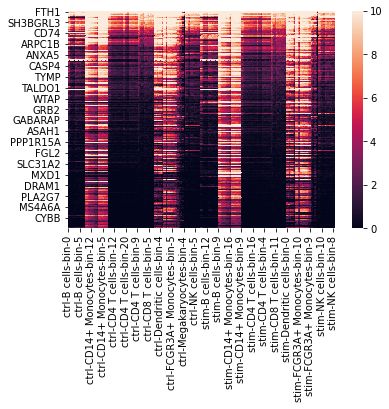

In [70]:
sns.heatmap(df_heatmap.iloc[600:800], vmin = 0, vmax = 10)

In [72]:
?df_subsetDEG.rename

In [69]:
df_subsetDEG.iloc[800:1000,]

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
FTL,Dendritic cells,31.816277,2.822581,1.392287e-127,3.543867e-124,0.995370,0.868199
CD74,Dendritic cells,93.256134,7.314777,0.000000e+00,0.000000e+00,0.993056,0.567056
HLA-DRA,Dendritic cells,82.511002,8.623764,1.542829e-318,2.748935e-314,0.986111,0.421352
EIF1,Dendritic cells,14.088263,1.097229,3.420953e-38,5.805031e-36,0.986111,0.920837
ACTB,Dendritic cells,27.452301,3.087364,1.578737e-101,2.812915e-98,0.976852,0.818819
...,...,...,...,...,...,...,...
CCL22,Dendritic cells,14.139410,8.957788,1.461021e-37,2.410346e-35,0.326389,0.002393
PKIB,Dendritic cells,14.076655,7.563581,2.667091e-37,4.379805e-35,0.326389,0.005610
P2RY6,Dendritic cells,12.584086,4.840789,3.628282e-31,4.170769e-29,0.317130,0.033373


In [68]:
np.unique(df_subsetDEG["Status"])

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes',
       'NK cells'], dtype=object)